# Proyecto Final 
## Analisis Exploratorio (Parte 1)
- Author: Lizette G. (GitHub: LizzyGamboa) (mail: lizzygamboap@gmail.com)
- Creation date: 14 July 2020

Se analizan los datos  de peliculas para una empresa de alquiler, la cual quiere saber información general de su almacén y cuál es el comportamiento de sus clientes respecto a su oferta de películas. El cliente ha compartido una base de datos que contiene información de las siguientes variables: 

* budget
* company
* country
* director
* genre
* gross
* name
* rating
* released
* runtime
* score
* star
* votes
* writer
* year

A continuacion, la primera parte del análisis explorario para la empresa: 

In [13]:
library(tidyr)
library(dplyr )
library(ggplot2)

options(warn=-1)

normalit<-function(m){
   (m - min(m))/(max(m)-min(m))
 }

In [2]:
movies <- read.csv("movies.csv" )
head(movies)

budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986


### ¿Cuántas peliculas se tienen en total por género?

In [3]:
movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)

genre,peliculas
War,2
Western,2
Musical,4
Sci-Fi,13
Family,14
Romance,15
Thriller,18
Fantasy,32
Mystery,38
Animation,277


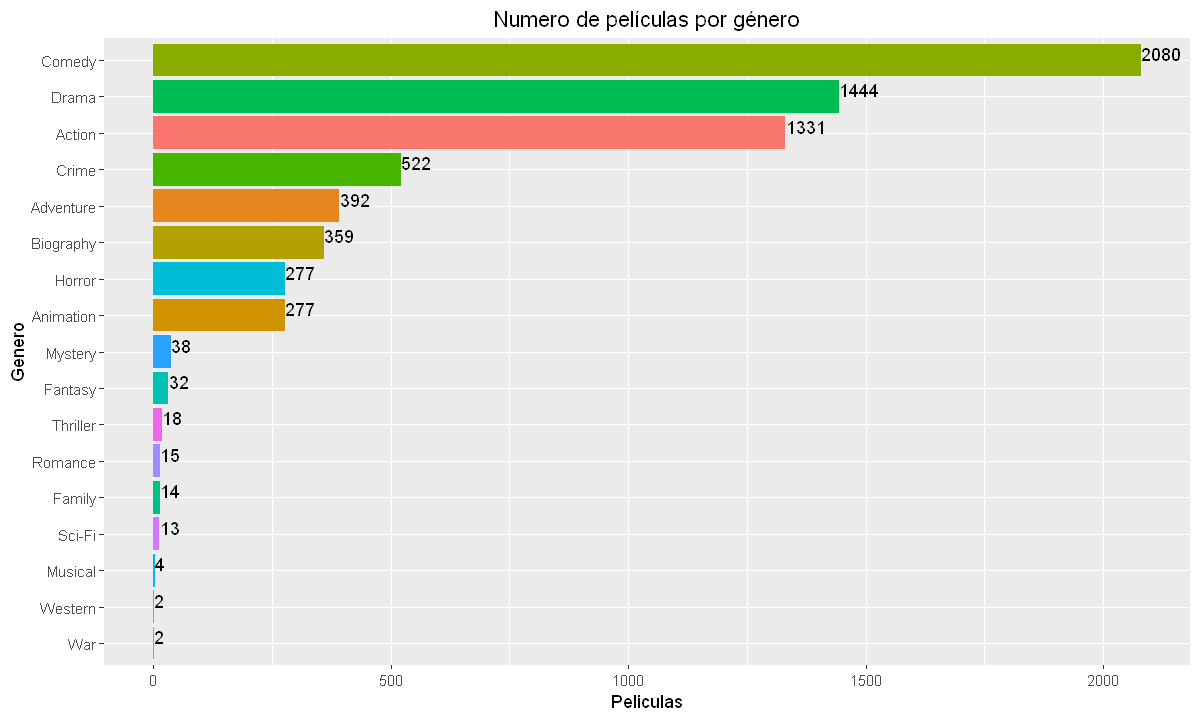

In [4]:
options(repr.plot.width=10, repr.plot.height=6)

table(movies$genre)  %>%  as.data.frame() %>% arrange(Freq)  %>% 
  ggplot(aes(x=reorder(Var1,Freq), y=Freq , fill=as.factor(Var1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Numero de películas por género")+
        coord_flip() +
        geom_text(aes( label=Freq, hjust=-.01, vjust=0)) + 
        xlab("Genero") + 
        ylab("Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

Si quisieramos concentrarnos en las categorías con los mayores números de películas, podemos agrupar el resto para mirar de una mejor manera la distribución: 

In [5]:
t1 <-movies  %>% group_by(genre) %>% summarise(peliculas=n() ) %>% arrange (peliculas)  %>% 
    mutate ( genre1= if_else(peliculas<50, "Otros", as.character(genre)))  %>%
    group_by( genre1)  %>% summarise(peliculas1=sum(peliculas) ) %>% as_tibble() %>%
    mutate(porcentaje= round(peliculas1/sum(peliculas1),2) )
t1

genre1,peliculas1,porcentaje
Action,1331,0.20
Adventure,392,0.06
Animation,277,0.04
Biography,359,0.05
Comedy,2080,0.30
Crime,522,0.08
Drama,1444,0.21
Horror,277,0.04
Otros,138,0.02


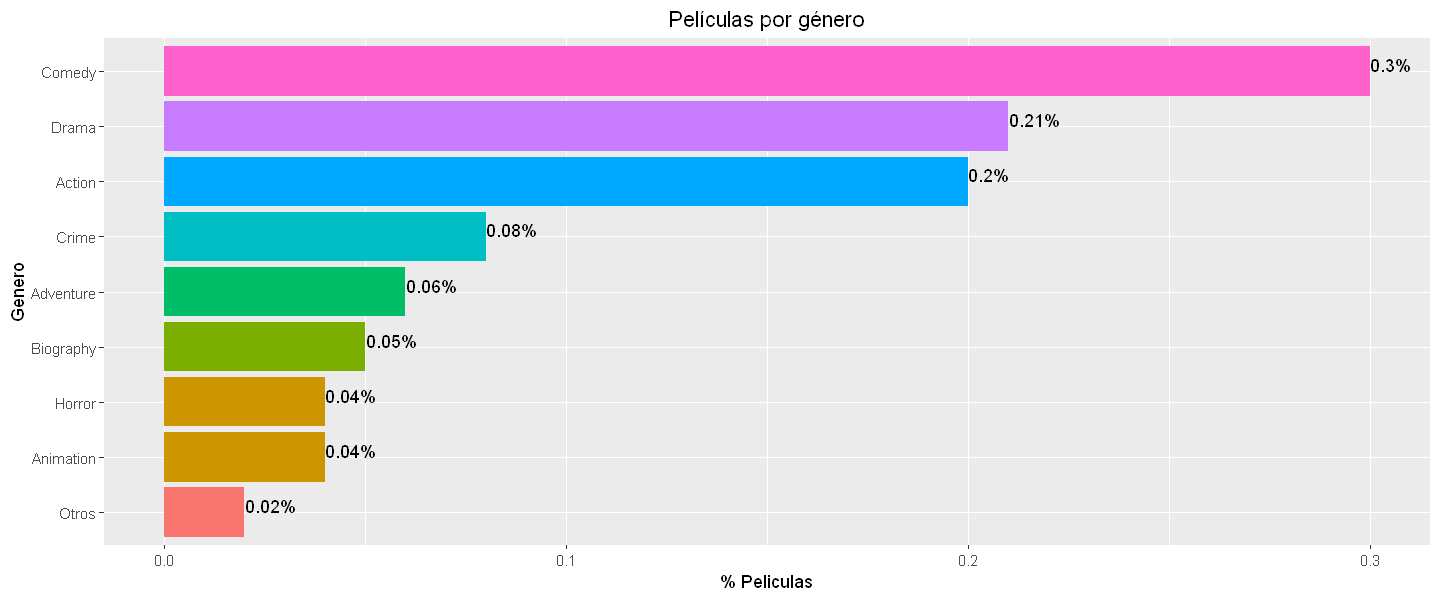

In [6]:
options(repr.plot.width=12, repr.plot.height=5)
t1  %>%  
    ggplot(aes(x=reorder(genre1,porcentaje), y=porcentaje , fill=as.factor(peliculas1)) )  +
        geom_bar(stat="identity") +
        ggtitle("Películas por género")+
        coord_flip() +
        geom_text(aes( label=paste0(porcentaje, "%"), hjust=-.01, vjust=0)) + 
        xlab("Genero") + 
        ylab("% Peliculas") +
        theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 

### ¿Cómo se ven las medidas de tendencia central por género?

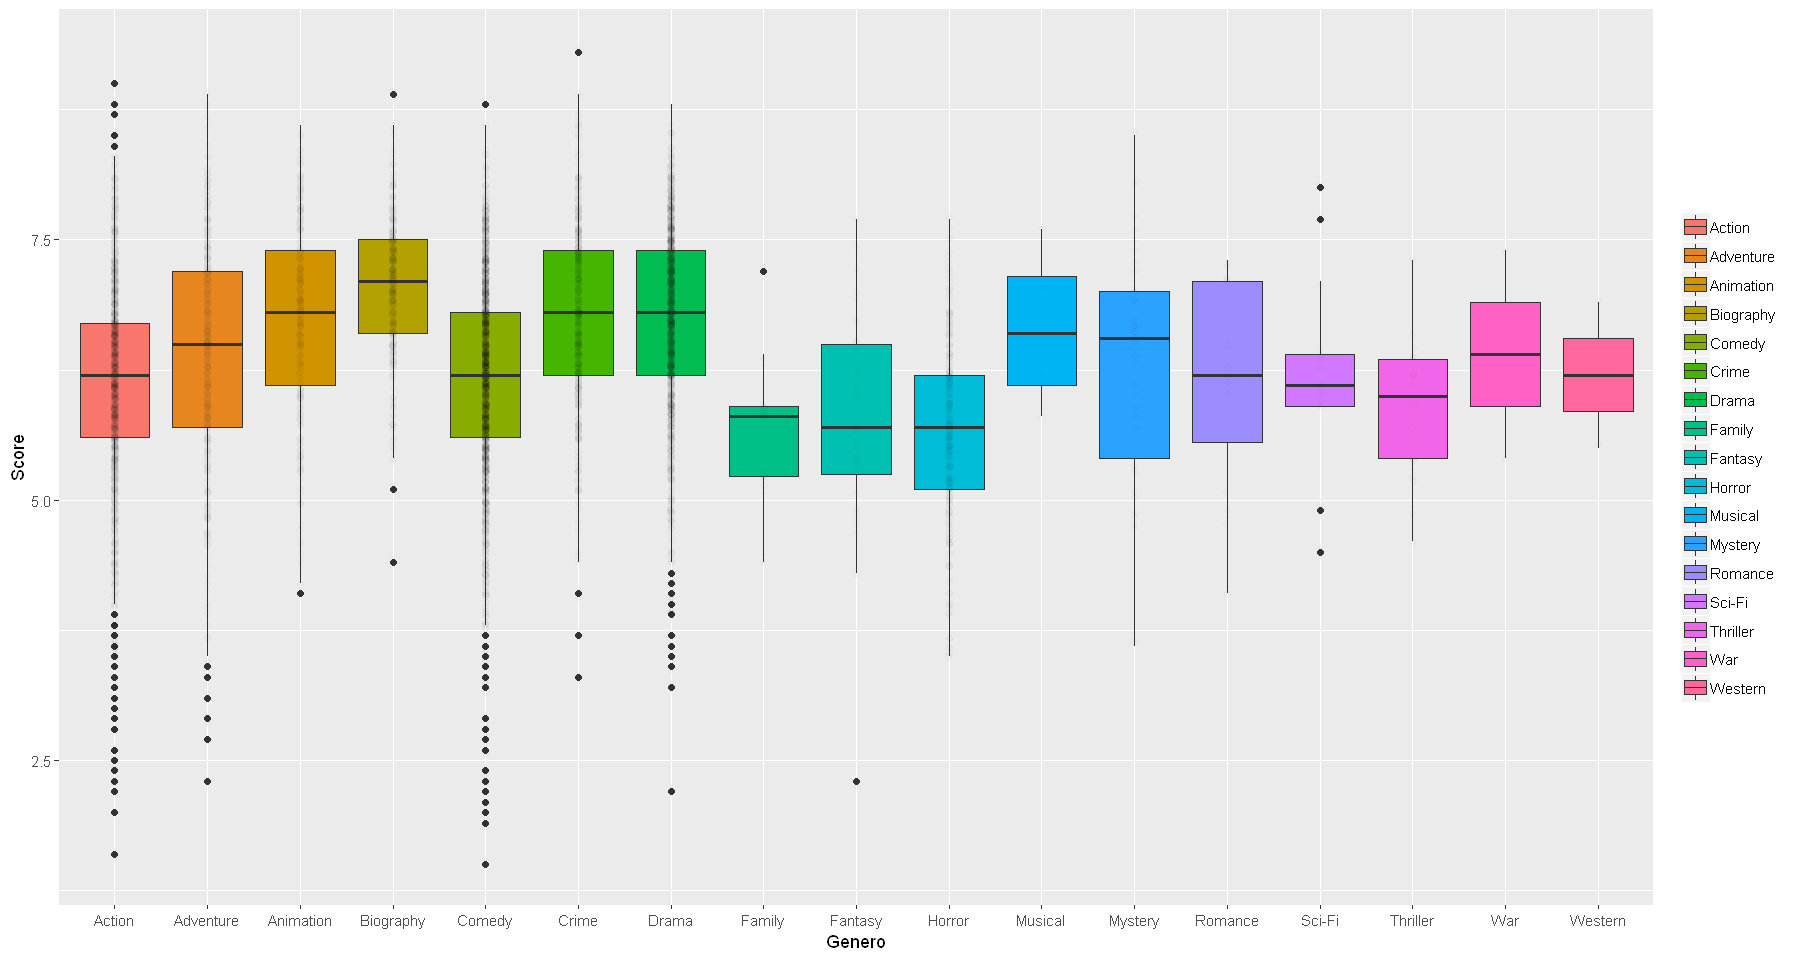

In [7]:
options(repr.plot.width=15, repr.plot.height=8)
# La distribucion de las calificaciones a las peliculas genero? 
movies %>% 
  ggplot(aes(genre,score, fill=as.factor(genre)) )  +
        geom_boxplot() +
        geom_jitter(width=0.005,alpha=0.01)+
        theme(legend.title = element_blank())+
        xlab("Genero") + 
        ylab("Score")

**Intepretación**

* Podemos decir a nuestro cliente que los géneros que tienen un promedio las mejores calificaciones (score) son los generos de peliculas Biograficas, seguidas de la de Animación. 
* La distribución de los géneros de Acción y Comedia, son los que tienen colas mas pesadas. 
* Los géneros con mayor varianza son Aventura, Misterio y Romance.

### (TOP 50 SCORE) Relacion de presupuesto, score y votos de las  50 peliculas con mejor score: 

Las variables son escaladas entre 0 y 1 para poder compararlas en los 3 gráficos siguientes. 

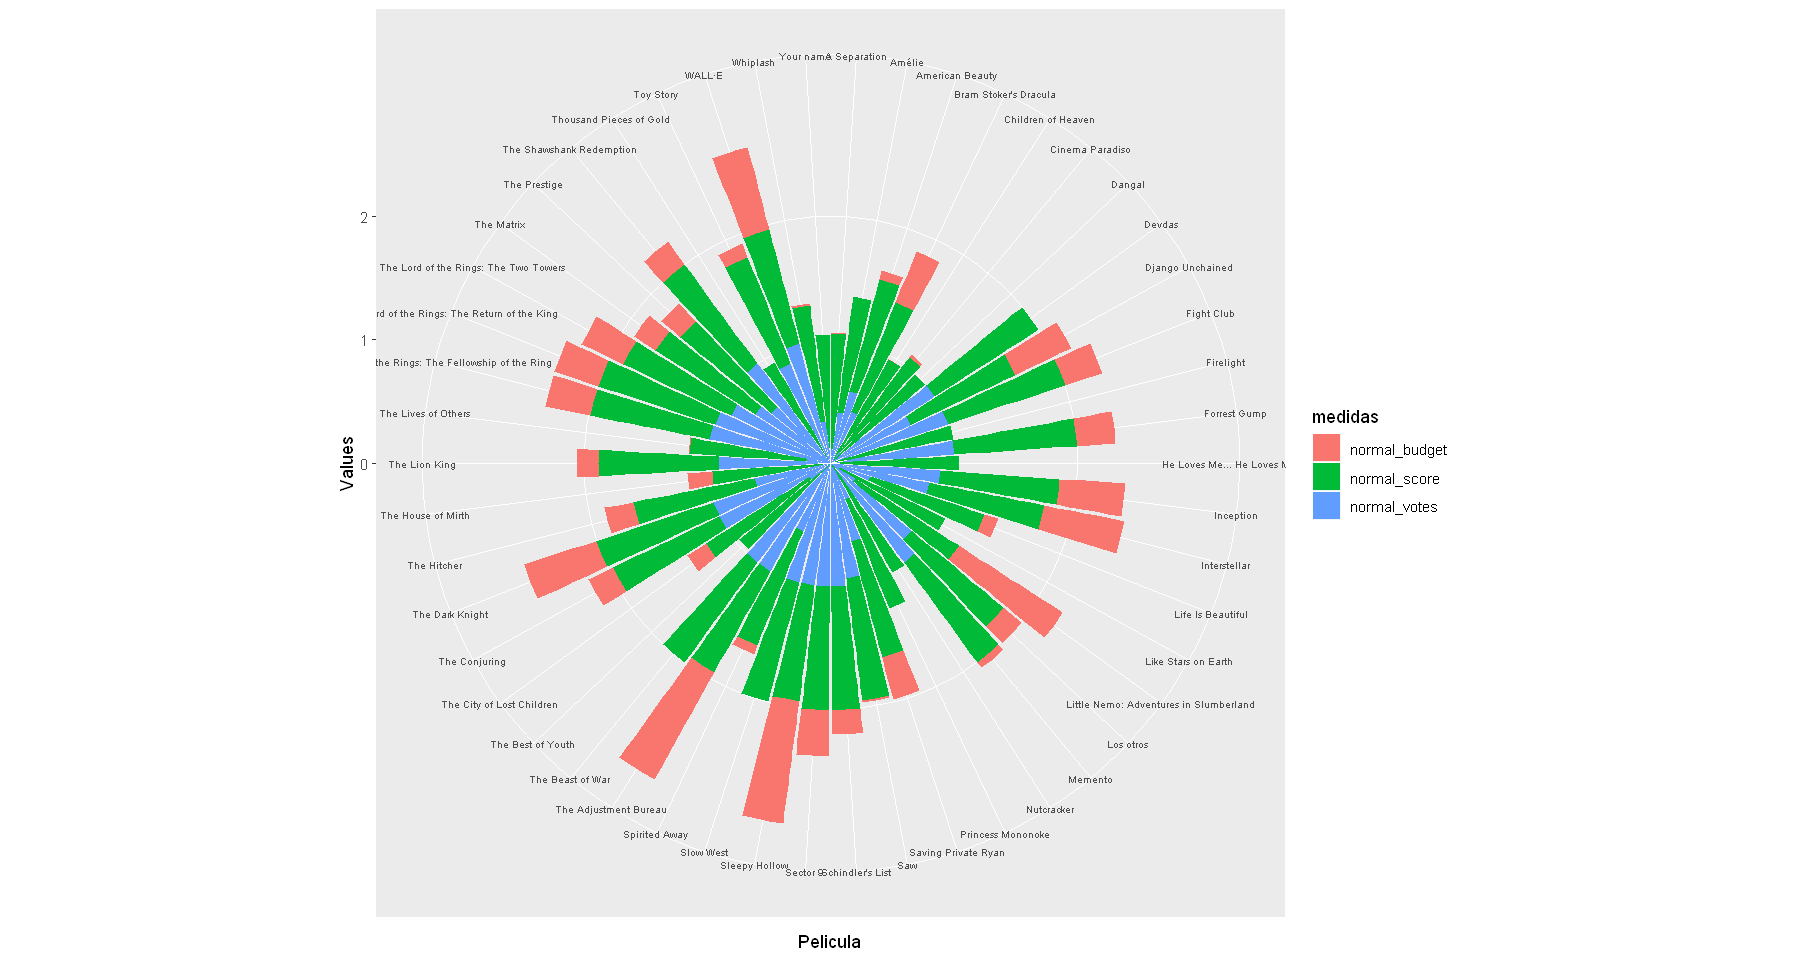

In [26]:
# Las primas 50 con mejor score

movies %>% 
    group_by(genre) %>%  
    mutate(normal_score= normalit(score),
        normal_budget= normalit(budget),
        normal_votes= normalit(votes))  %>% 
    as_tibble() %>% select(name, genre, normal_score,normal_budget,normal_votes) %>% 
    arrange( desc(normal_score))   %>% 
    head(50)  %>% # las 100 peliculas con mejor score por genero 
    gather(key = "medidas", value="values", -c(1,2))   %>% 

ggplot() +  
    geom_bar(aes(x=as.factor(name), y=values, fill=medidas), stat="identity") +
    xlab("Pelicula") + 
    ylab("Values") +
    theme(axis.text.x = element_text( size=6 )) +
    coord_polar()   



* Lo que podemos observar en la gráfica anterior es que de las 50 peliculas que tienen mejor score, las que tienen igualmente un alto presupuesto y altos votos son: "Sleepy Hollow", "WALL-E" y "The Adjustment Bureau".


* Es interesante que de las peliculas con mas bajos presupuestos (diferentes de cero o que tienen información) que estan en el top 50 de score son: "Whiplash", "Children of Heaven", "A Separation", "The Lives of Others", "Saw", y  "Cinema Paradiso"


* Son pocas las peliculas del top 50 de Score que tienen pocos votos, entre ellas: "Firelight", "Firelight", "Nutcracker" y "Children of Heaven"



### (TOP 50 PRESUPUESTO) Relacion de presupuesto, score y votos de las  50 peliculas con mejor presupuesto: 

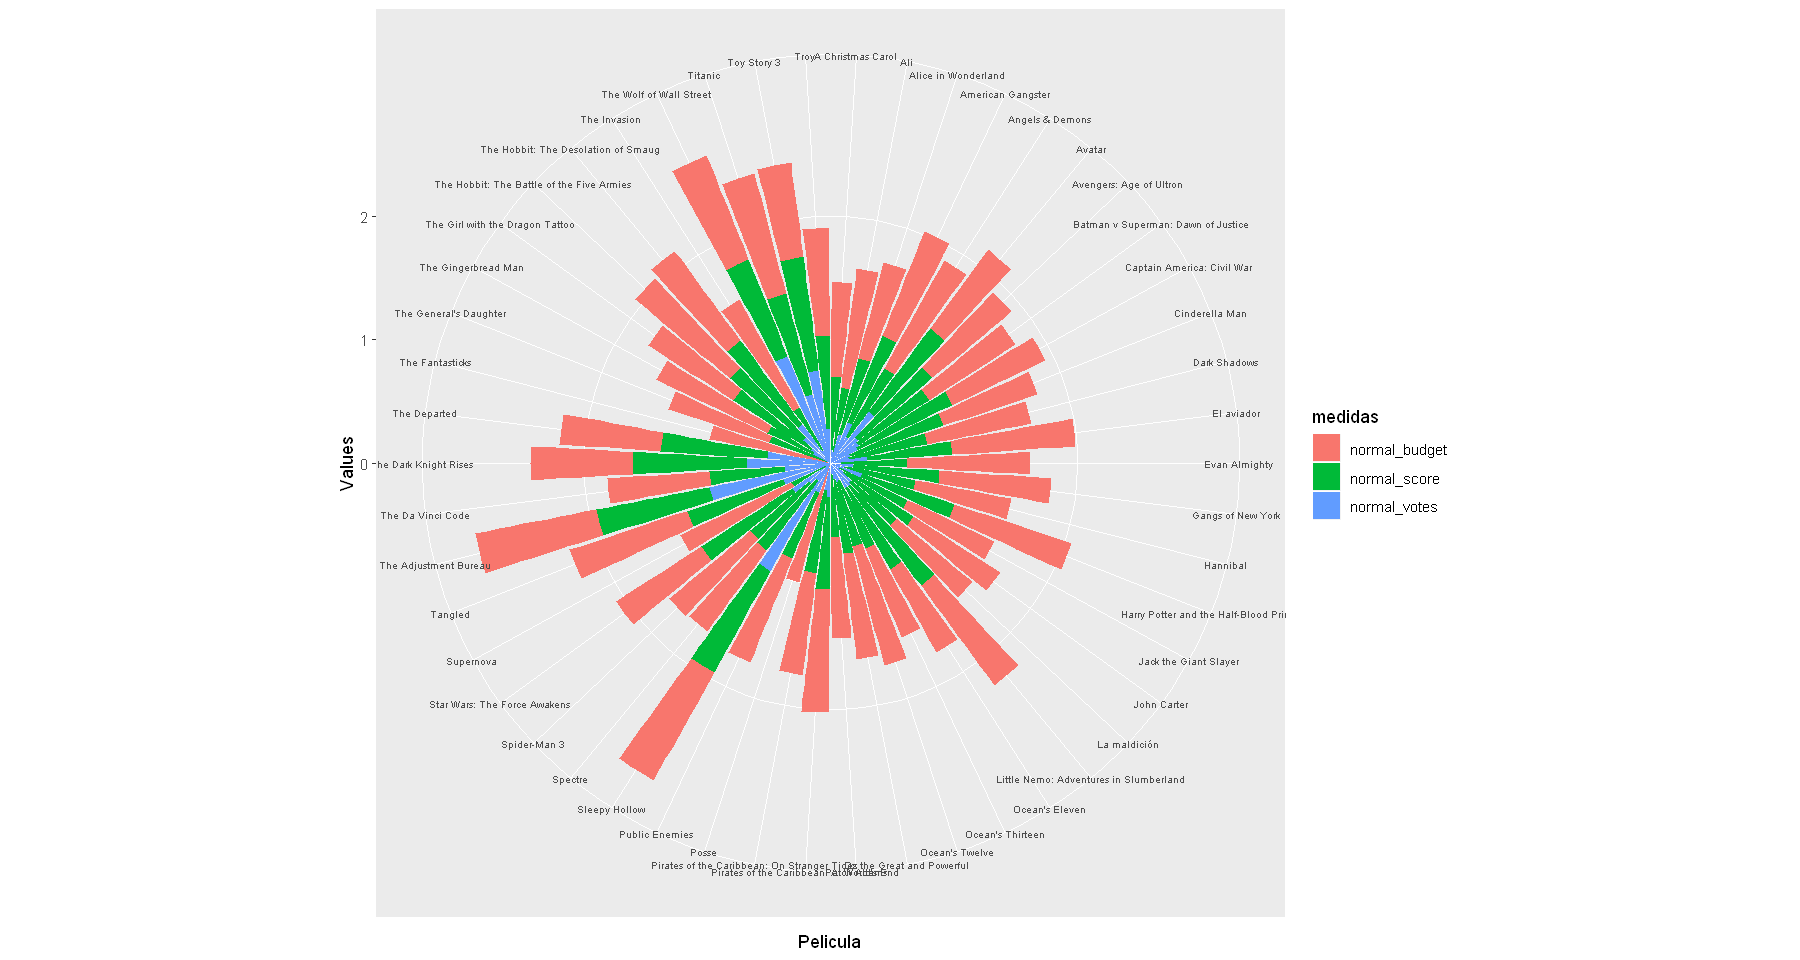

In [30]:
# Las primas 50 con mejor presupuesto

movies %>% 
    group_by(genre) %>%  
    mutate(normal_score= normalit(score),
        normal_budget= normalit(budget),
        normal_votes= normalit(votes))  %>% 
    as_tibble() %>% select(name, genre, normal_score,normal_budget,normal_votes) %>% 
    arrange( desc(normal_budget))   %>% 
    head(50)  %>% # las 100 peliculas con mejor score por genero 
    gather(key = "medidas", value="values", -c(1,2))   %>% 

ggplot() +  
    geom_bar(aes(x=as.factor(name), y=values, fill=medidas), stat="identity") +
    xlab("Pelicula") + 
    ylab("Values") +
     theme(axis.text.x = element_text( size=6 ))+
     coord_polar()   



* El top 50 de peliculas con mayor presupuesto tiene una relación positiva en general con el score, ya que se miran balanceadas las caterogorias, por otro lado no es de la misma manera con lo votos. 
Las peliculas que pese a su presupuesto y score tienen poca proporción de votos en relacion a su género son: "The General's Daughter", "Supernova","Jack the Giant Slayer" y  "Posse"



### (TOP 50 VOTOS) Relacion de presupuesto, score y votos de las  50 peliculas con más votos: 

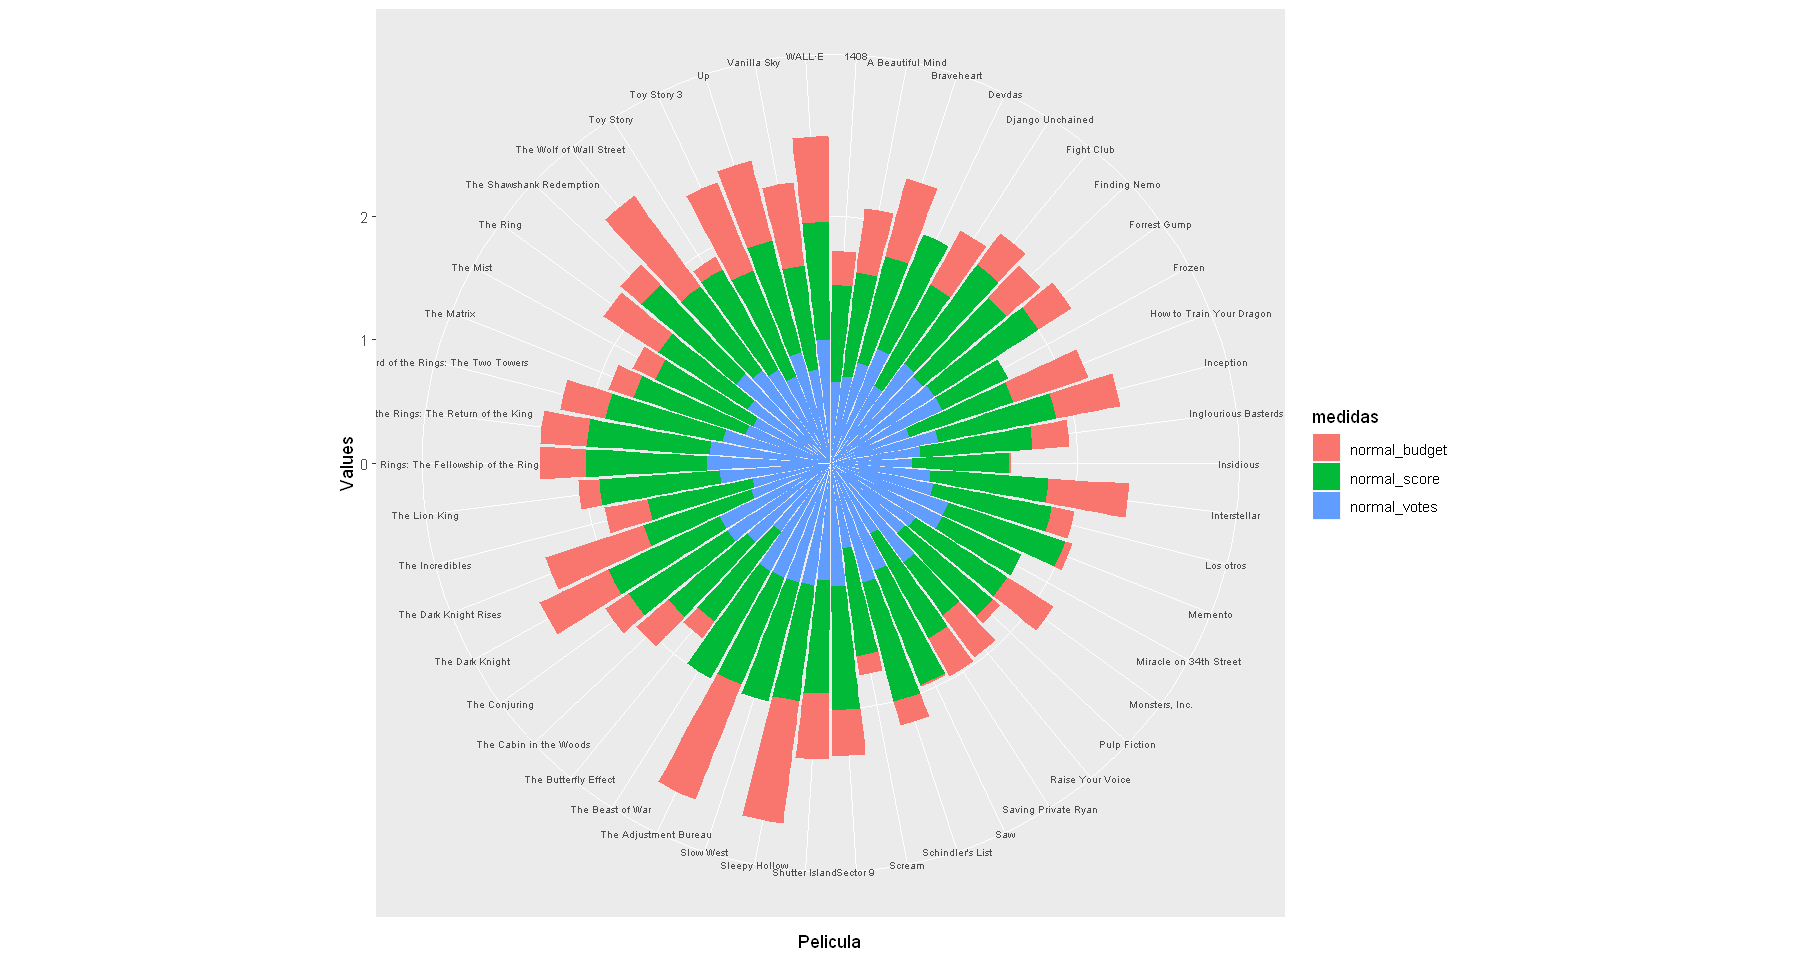

In [41]:
movies %>% 
    group_by(genre) %>%  
    mutate(normal_score= normalit(score),
        normal_budget= normalit(budget),
        normal_votes= normalit(votes))  %>% 
    as_tibble() %>% select(name, genre, normal_score,normal_budget,normal_votes) %>% 
    arrange( desc(normal_votes))   %>% 
    head(50)  %>% # las 100 peliculas con mejor score por genero 
    gather(key = "medidas", value="values", -c(1,2))   %>% 

ggplot() +  
    geom_bar(aes(x=as.factor(name), y=values, fill=medidas), stat="identity") +
    xlab("Pelicula") + 
    ylab("Values") +
    theme(axis.text.x = element_text( size=6 ))+
    coord_polar()  

* De las pelicuas del top 50 de votos, en general tienen un score alto, sin embargo es de notarse las peliculas que con estas catacteristicas tuvieron un bajo presupuesto respecto a su genero, entre ellas se encuentran las ya mencionadas anteriormente: "Saw", "Insidious", "Pulp Fiction" y "Toy Story"




### ¿Cómo es la relación entre la duración y la calificación de las peliculas? ¿Tendrá alguna relación con el género o el país?

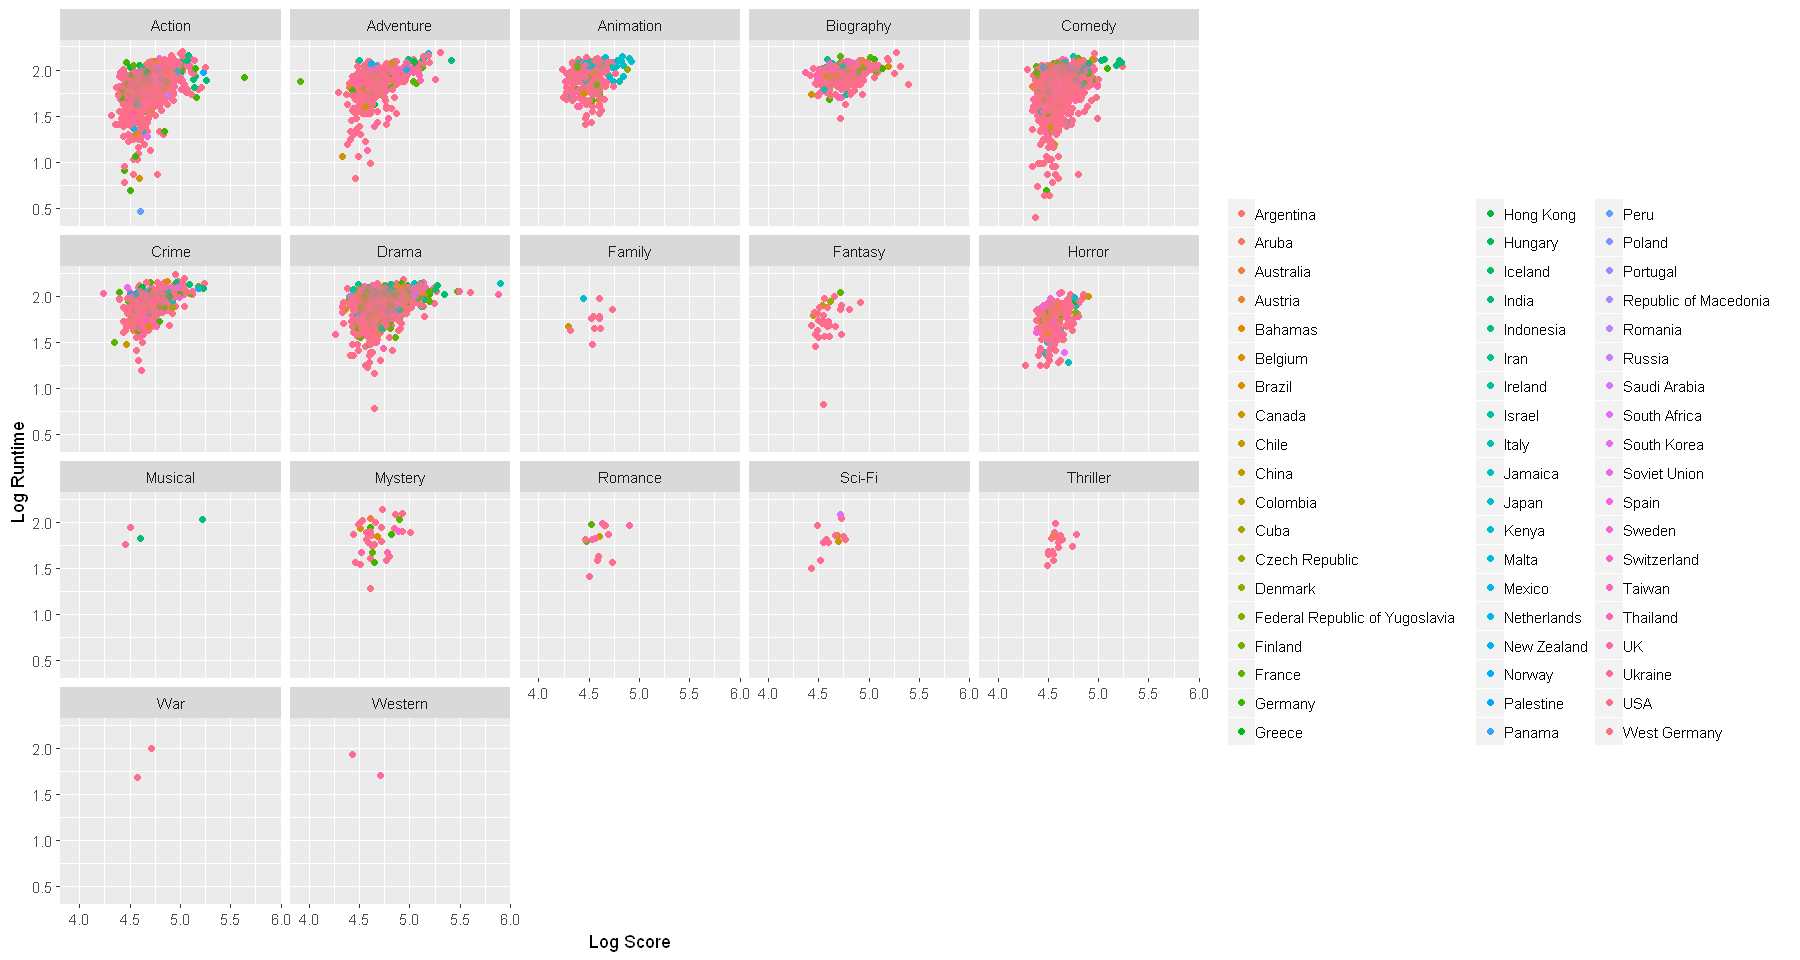

In [11]:
movies %>% 
  ggplot(aes(log(runtime),log(score), color=as.factor(country ) ))  +
        geom_point() +
        geom_jitter(width=0.005,alpha=0.05)+facet_wrap(~genre,nrow=4) +
        theme(legend.title = element_blank())+
        xlab("Log Score") + 
        ylab("Log Runtime")
        


Se puede observar tendencias positivas en general sin embargo hay poca varianza. 

### ¿Cómo es la relación entre los votos y la calificación por género?

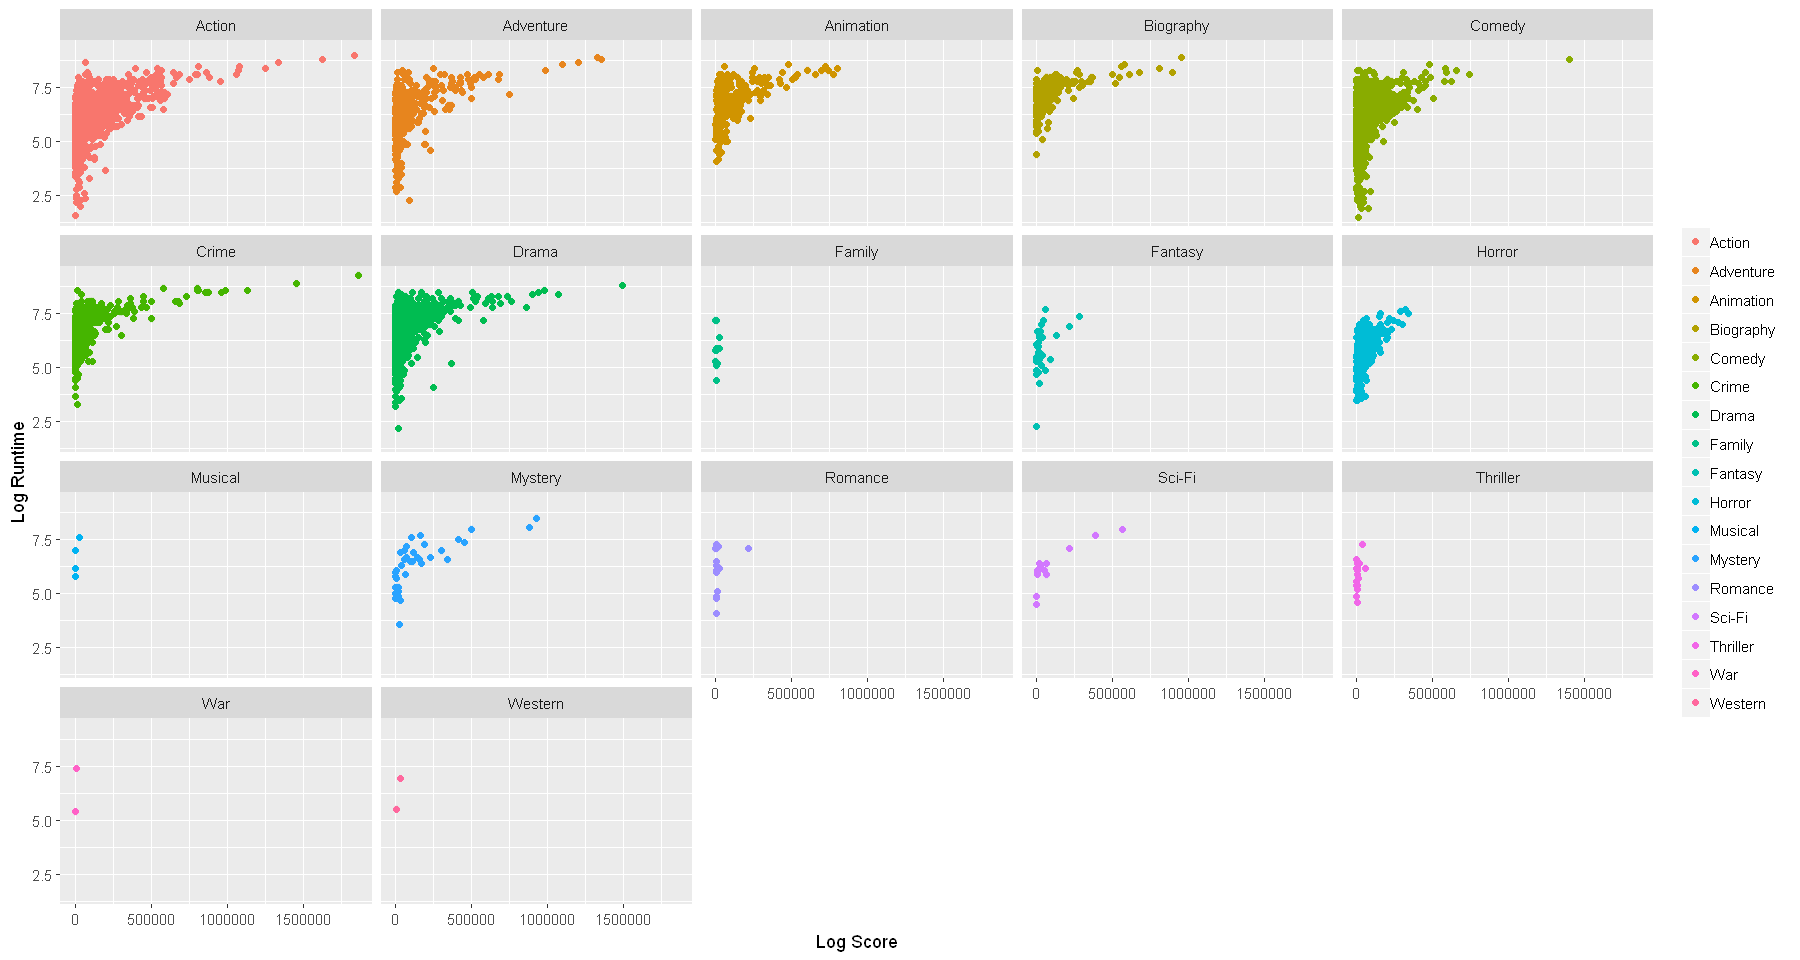

In [12]:
movies %>% 
  ggplot(aes((votes),(score) , color=as.factor(genre)))  +
        geom_point() +
        geom_jitter(width=0.005,alpha=0.05)+facet_wrap(~genre,nrow=4) +
        theme(legend.title = element_blank())+
        xlab("Log Score") + 
        ylab("Log Runtime")